In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import mplcyberpunk
import seaborn as sns
import os

%matplotlib inline

In [19]:
# Load data
data_path = os.path.join("..", "data", "cleaned", "data_with_currency.csv")
data = pd.read_csv(data_path)
data.head ()

,Location,Price,Commission,TVA,Currency,Rooms,Size,Floor,Composition
0,Marasti,178000,NaN,False,True,3,73.00,5/6,Dec
1,Marasti,133300,NaN,True,True,3,62.00,3/6,Semidec
2,Zorilor,155646,NaN,True,True,3,63.00,1/4,Dec
3,Manastur,150000,Comision 0%,False,True,3,70.00,6/10,Dec
4,Manastur,127990,Comision 0%,False,True,2,49.00,7/10,Semidec


## Cluj-Napoca Real Estate Data Analysis and Visualisation 

In [20]:
data.info ()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7571 entries, 0 to 7570
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Location     7571 non-null   object 
 1   Price        7571 non-null   int64  
 2   Commission   593 non-null    object 
 3   TVA          7571 non-null   bool   
 4   Currency     7571 non-null   bool   
 5   Rooms        7571 non-null   int64  
 6   Size         7571 non-null   float64
 7   Floor        7571 non-null   object 
 8   Composition  7571 non-null   object 
dtypes: bool(2), float64(1), int64(2), object(4)
memory usage: 429.0+ KB


In [21]:
print ('Describe Cluj-Napoca housing data:\n' + str(data.describe ()))

Describe Cluj-Napoca housing data:
          Price   Rooms    Size
count   7571.00 7571.00 7571.00
mean  165811.19    2.48   62.06
std    71961.54    0.86   23.75
min    18000.00    1.00   11.00
25%   122000.00    2.00   48.00
50%   152000.00    2.00   58.00
75%   189000.00    3.00   70.48
max   770000.00    6.00  308.00


In [22]:

mean_per_roomnr = data.groupby("Rooms")["Price"].mean()
median_per_roomnr = data.groupby("Rooms")["Price"].median()

print ('mean: ' + str(data['Price'].mean()))
print ('median: ' + str(data['Price'].median()))

pd.set_option('display.float_format', lambda x: '%.2f' % x)
mean_per_roomnr.map('{:,}'.format)

print (mean_per_roomnr)

mean: 165811.18940694755
median: 152000.0
Rooms
1    92614.76
2   142829.23
3   190066.53
4   237626.76
5   329326.10
6   362415.79
Name: Price, dtype: float64


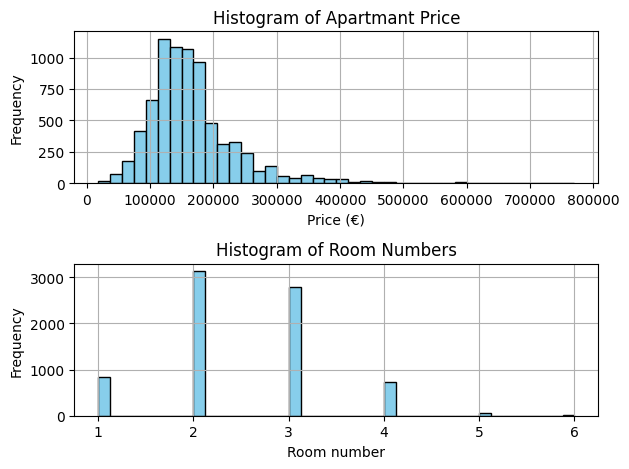

In [23]:
fig, axs = plt.subplots(2)

# Plot data on the first subplot
axs[0].hist(data['Price'], bins=40, color='skyblue', edgecolor='black')
axs[0].set_title('Histogram of Apartmant Price')
axs[0].set_xlabel('Price (€)')
axs[0].set_ylabel('Frequency')
axs[0].grid(True)

# Plot data on the second subplot
axs[1].hist(data['Rooms'], bins=40, color='skyblue', edgecolor='black')
axs[1].set_title('Histogram of Room Numbers')
axs[1].set_xlabel('Room number')
axs[1].set_ylabel('Frequency')
axs[1].grid(True)

# Adjust layout to prevent overlap
plt.tight_layout()

# Display the plot
plt.show()

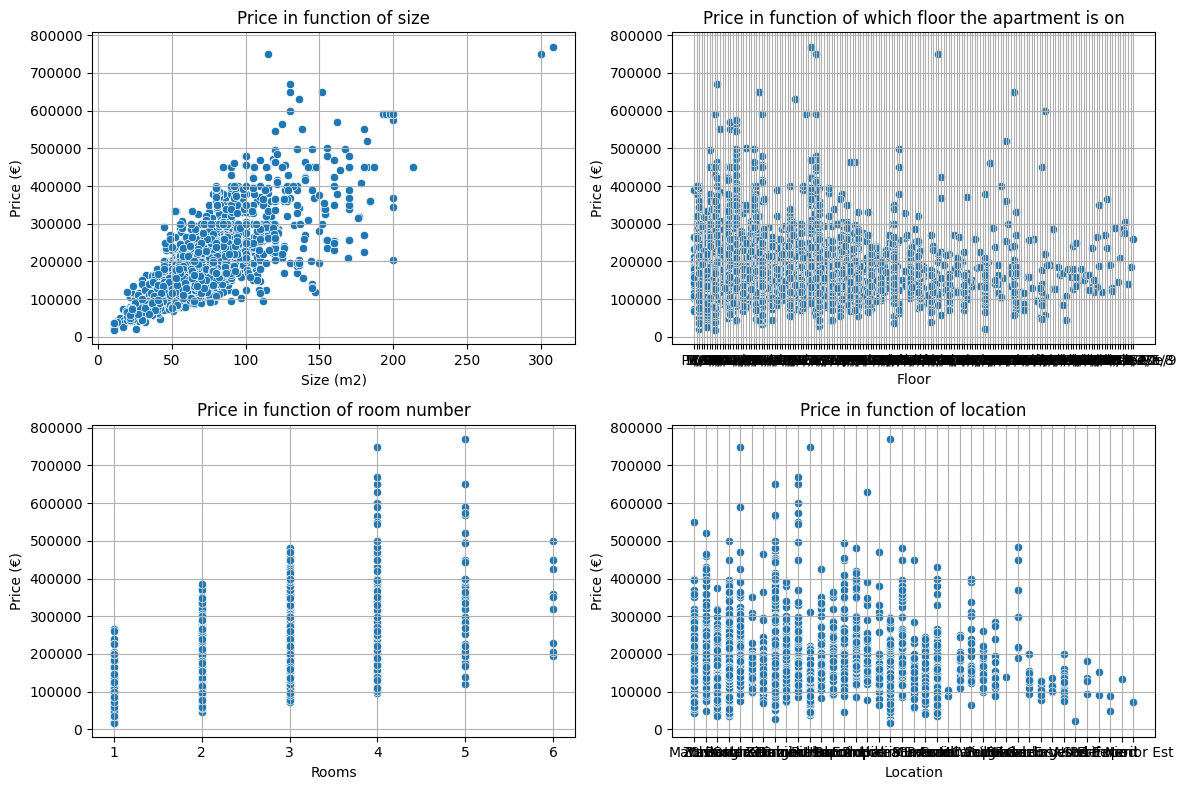

In [24]:
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

# Plot data on the first subplot
sns.scatterplot(x="Size", y="Price", data=data, ax=axs[0, 0])
axs[0, 0].set_title('Price in function of size')
axs[0, 0].set_xlabel('Size (m2)')
axs[0, 0].set_ylabel('Price (€)')
axs[0, 0].grid(True)

# Plot data on the second subplot
sns.scatterplot(x="Floor", y="Price", data=data, ax=axs[0, 1])
axs[0, 1].set_title('Price in function of which floor the apartment is on')
axs[0, 1].set_xlabel('Floor')
axs[0, 1].set_ylabel('Price (€)')
axs[0, 1].grid(True)

# Plot data on the second subplot
sns.scatterplot(x="Rooms", y="Price", data=data, ax=axs[1, 0])
axs[1, 0].set_title('Price in function of room number')
axs[1, 0].set_xlabel('Rooms')
axs[1, 0].set_ylabel('Price (€)')
axs[1, 0].grid(True)


sns.scatterplot(x="Location", y="Price", data=data, ax=axs[1, 1])
axs[1, 1].set_title('Price in function of location')
axs[1, 1].set_xlabel('Location')
axs[1, 1].set_ylabel('Price (€)')
axs[1, 1].grid(True)

# Adjust layout to prevent overlap
plt.tight_layout()

# Display the plot
plt.show()



# Clean some less relevant data for visibility's sake in later plots

In [25]:
# less relevant locations
data = data[data['Location'] != 'Est']
data = data[data['Location'] != 'Vest']
data = data[data['Location'] != 'Sud']
data = data[data['Location'] != 'Nord']
data = data[data['Location'] != 'Exterior Est']
data = data[data['Location'] != 'Exterior Vest']
data = data[data['Location'] != 'Exterior Nord']
data = data[data['Location'] != 'Cordos']
data = data[data['Location'] != 'Periferie']
data = data[data['Location'] != 'Aeroport']
data = data[data['Location'] != 'Faget']
data = data[data['Location'] != 'Someseni']

# location name describes a sublocation of a district
data['Location'] = data['Location'].str.replace('Becas', 'Gheorgheni')
data['Location'] = data['Location'].str.replace('Hasdeu', 'Central')
data['Location'] = data['Location'].str.replace('Aurel Vlaicu', 'Marasti')
data['Location'] = data['Location'].str.replace('P-ta Mihai Viteazul', 'Central')
data['Location'] = data['Location'].str.replace('Campului', 'Manastur')
data['Location'] = data['Location'].str.replace('Calea Turzii', 'Europa')
data['Location'] = data['Location'].str.replace('Horea', 'Semicentral')
data['Location'] = data['Location'].str.replace('Gara', 'Semicentral')
data['Location'] = data['Location'].str.replace('Gruia', 'Semicentral')
data['Location'] = data['Location'].str.replace('Plopilor', 'Central')
data['Location'] = data['Location'].str.replace('Bulgaria', '')

In [26]:

sns.scatterplot(x="Location", y="Price", data=data, ax=axs[1, 1])

<Axes: title={'center': 'Price in function of location'}, xlabel='Location', ylabel='Price (€)'>

Location
Manastur           1576
Marasti             997
Central             799
Gheorgheni          757
Zorilor             599
Iris                453
Semicentral         412
Buna Ziua           343
Grigorescu          325
Dambul Rotund       255
Europa              224
Borhanci            201
Intre Lacuri        160
Andrei Muresanu     144
Sopor                99
Ultracentral         85
                     19
Name: count, dtype: int64


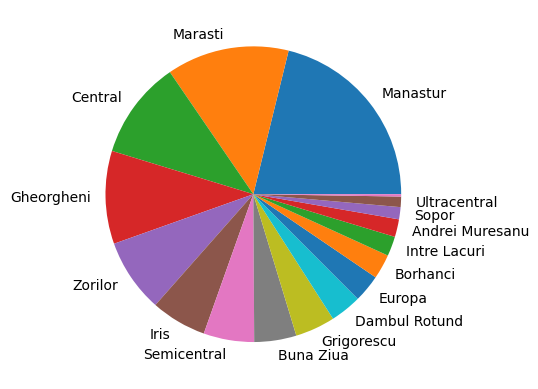

In [27]:
# apartmans by district
countByDistrict = data['Location'].value_counts()

print (countByDistrict)

y = countByDistrict.values.tolist()
mylabels = countByDistrict.index.tolist()

plt.pie(y, labels = mylabels)
plt.show() 

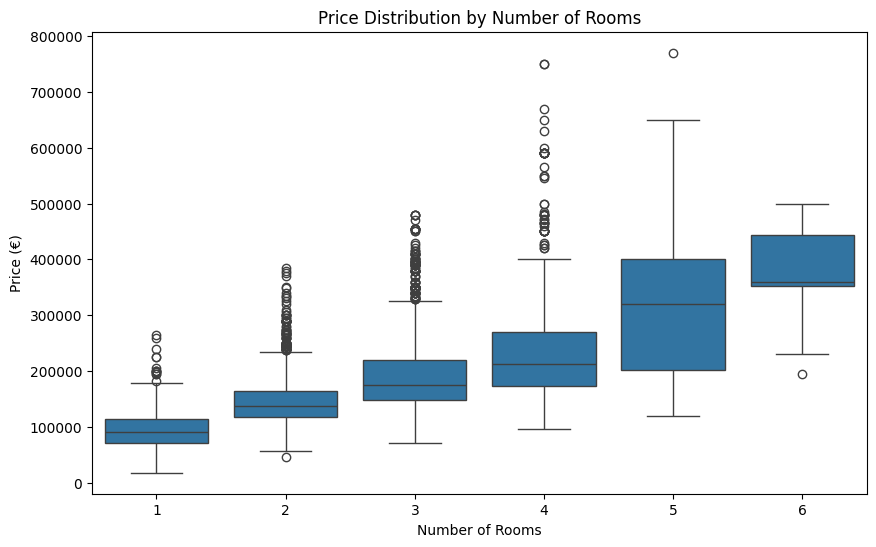

In [28]:
# distribution by number of rooms

plt.figure(figsize=(10, 6))
sns.boxplot(x='Rooms', y='Price', data=data)
plt.title('Price Distribution by Number of Rooms')
plt.xlabel('Number of Rooms')
plt.ylabel('Price (€)')
plt.show()